## mnist digit recogniton 

In [1]:
import customnet as cn
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train.reshape((60000, 784)) / 255.0, x_test.reshape((10000, 784)) / 255.0
y_train_ohv, y_test_ohv = np.zeros((60000, 10)), np.zeros((10000, 10))
for i in range(60000):
    y_train_ohv[i][y_train[i]] = 1
for i in range(10000):
    y_test_ohv[i][y_test[i]] = 1

In [6]:
SIZE = 1000
B_SIZE = 10
LOSS_FN = 'ce'
ALPHA = 1e-1
BETA = 0.99
EPOCHS = 5000

model = cn.Model([784, 64, 64, 10], ['sigmoid', 'sigmoid', 'sigmoid'], [1e-9, 1e-8])

model.SGD(
    x_train[:SIZE], 
    y_train_ohv[:SIZE], 
    batch_size=B_SIZE, 
    loss_fn=LOSS_FN, 
    alpha=ALPHA, 
    beta=BETA, 
    epochs=EPOCHS)

# model.plot(EPOCHS, (6, 6))

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [1:11:04<00:00,  1.17it/s]


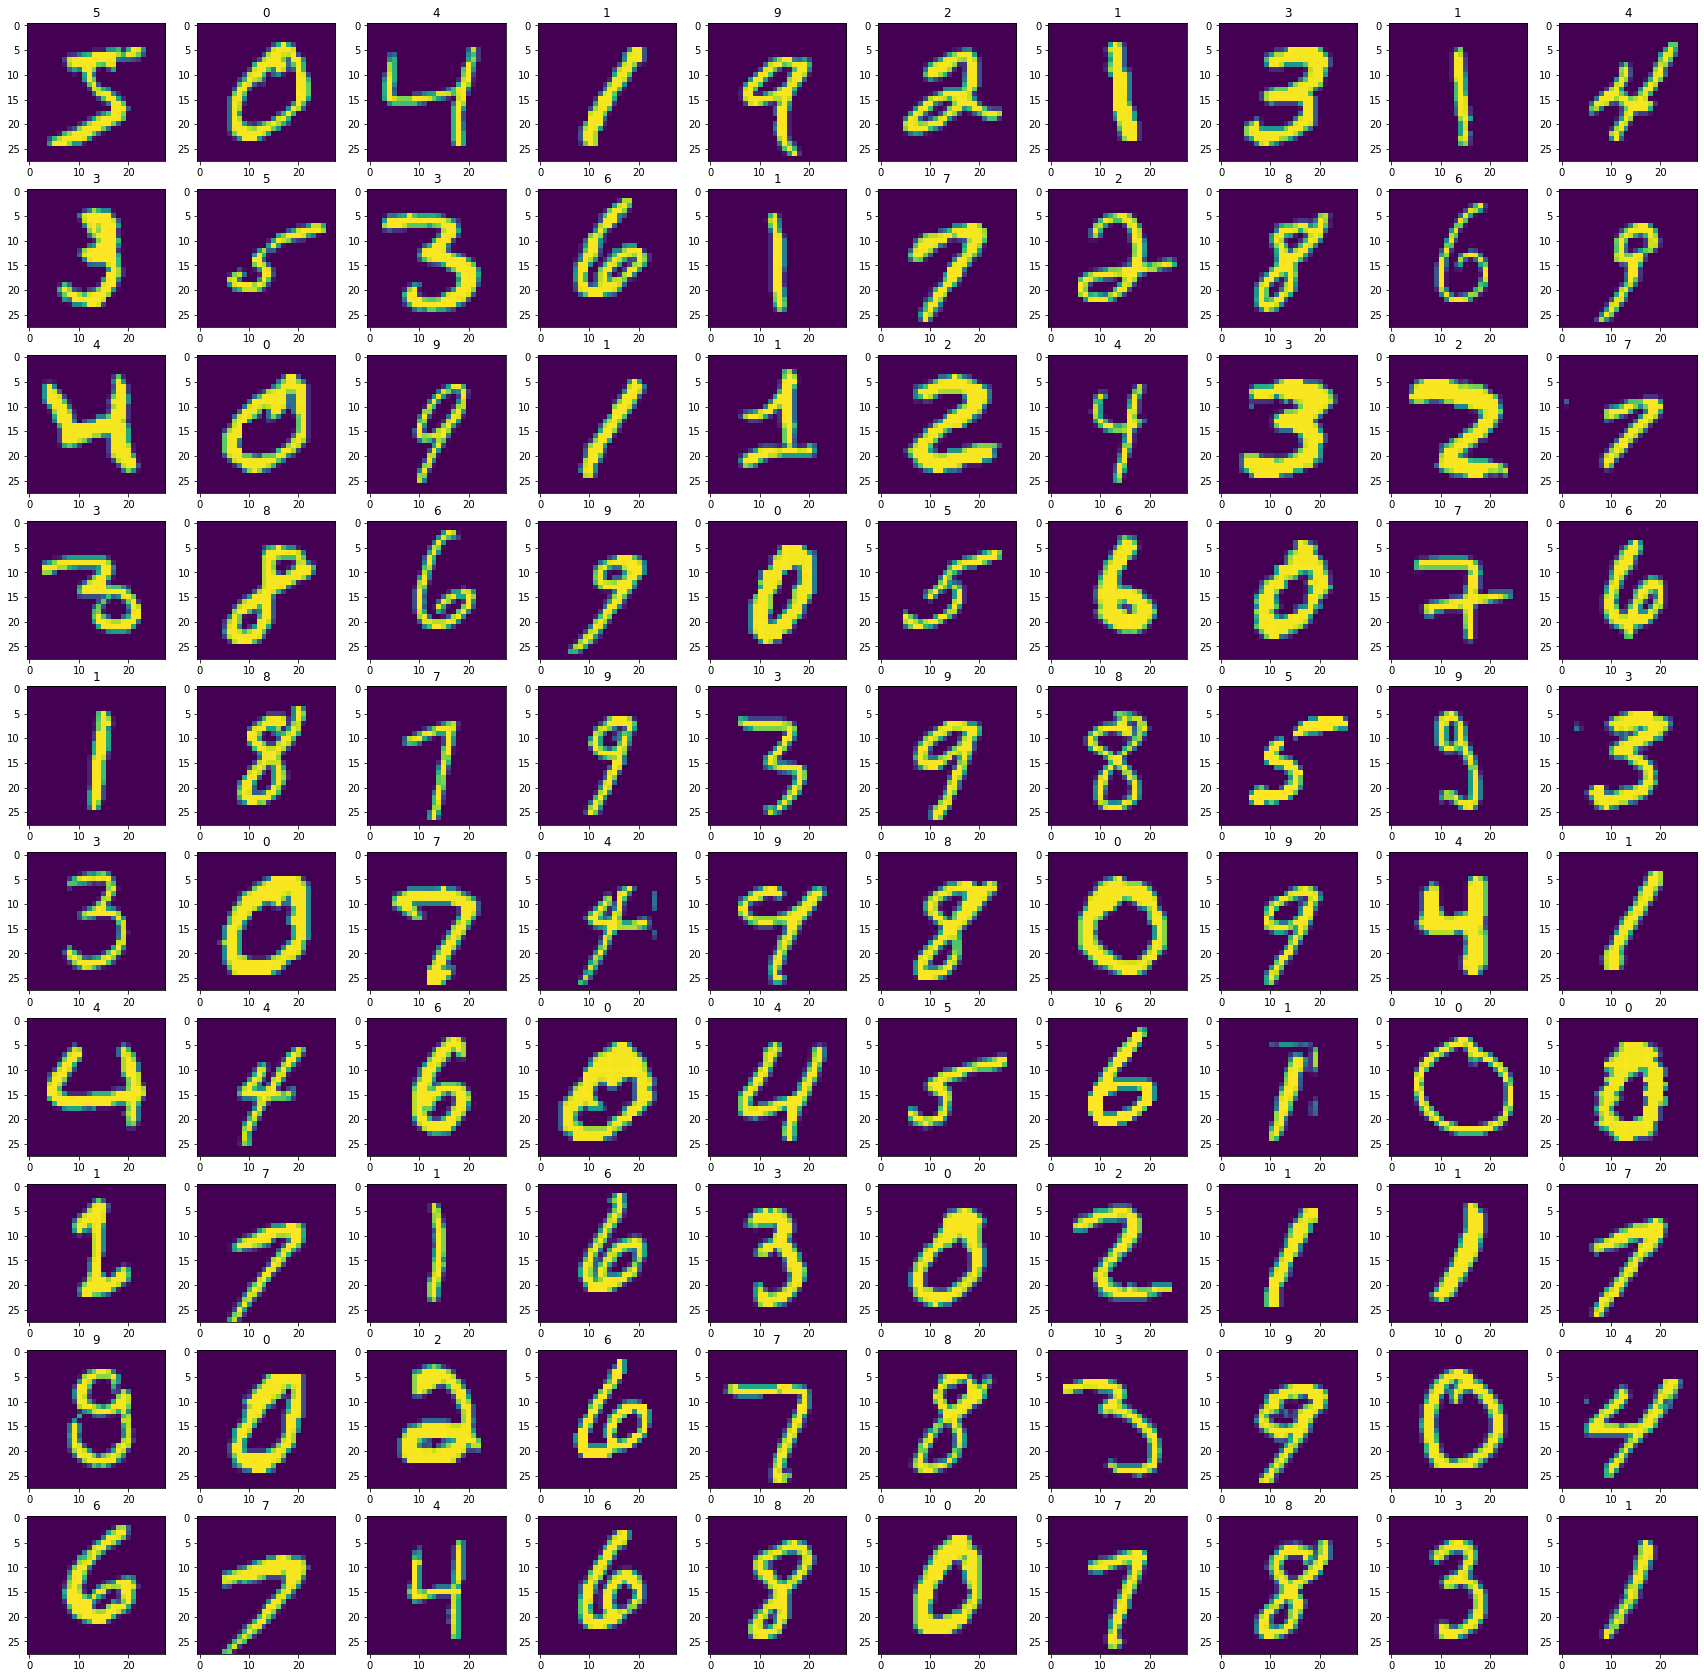

In [7]:
plt.figure(figsize=(30, 30))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.title(f'{np.argmax(model.forward(x_train[i]))}')
    plt.imshow(x_train[i].reshape((28, 28)))
plt.show()

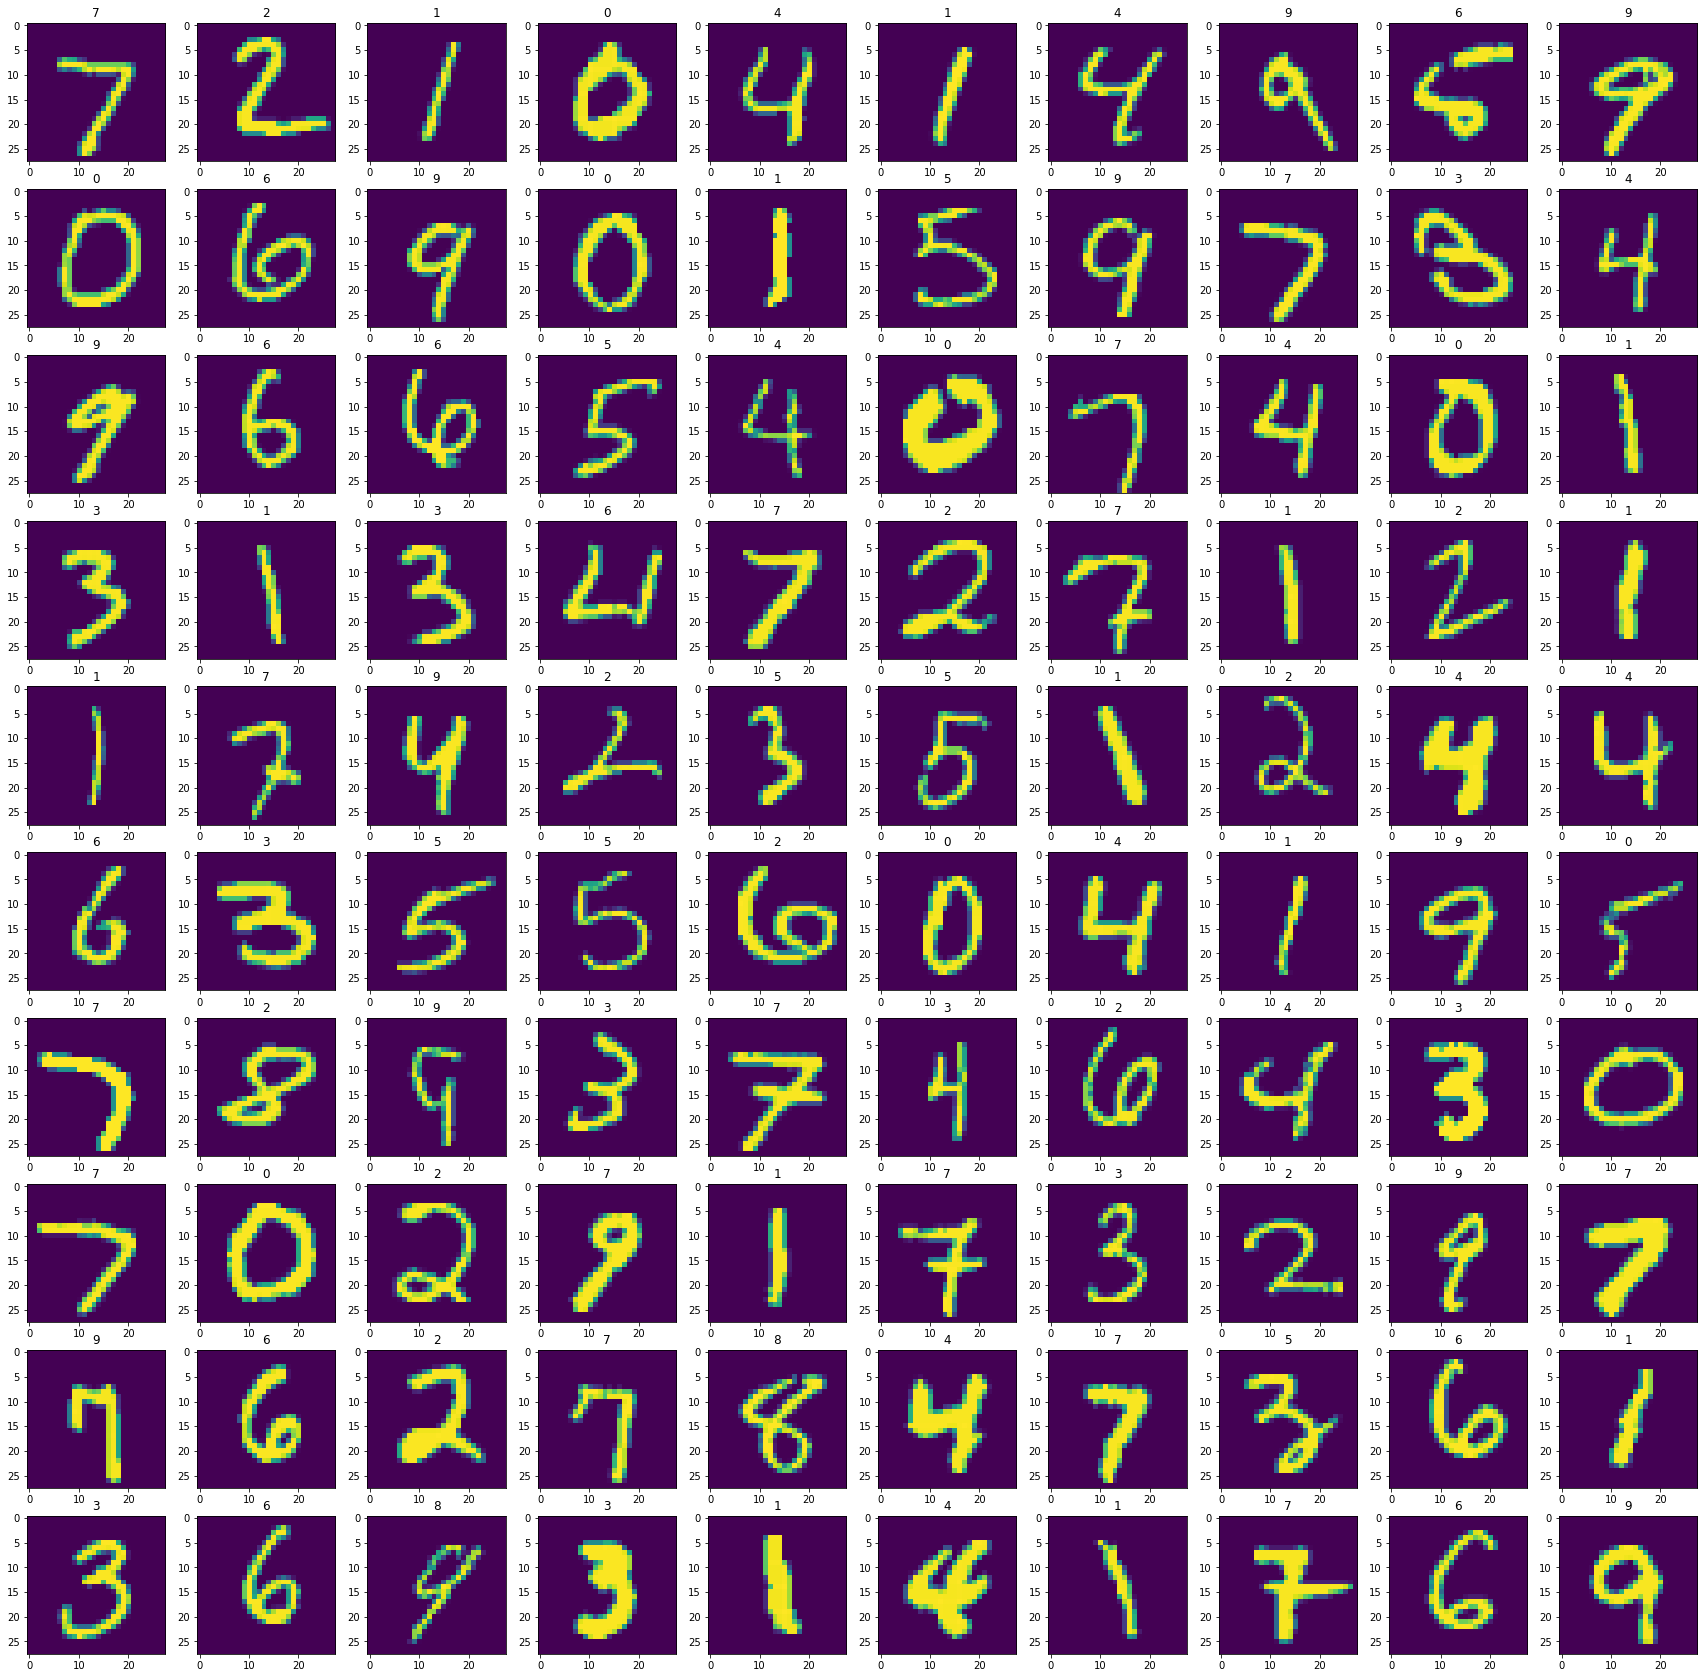

acc - 87.0 %


In [14]:
plt.figure(figsize=(30, 30))
ct = 0
for i in range(100):
    out = model.forward(x_test[i])
    pred = np.argmax(out)
    ct += int(pred == y_test[i])
    plt.subplot(10, 10, i + 1)
    plt.title(f'{pred}')
    plt.imshow(x_test[i].reshape((28, 28)))
plt.show()
print(f'acc - {(ct / 100) * 100} %')